---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [4]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [6]:
def answer_one():
    df = pd.read_csv('assets/fraud_data.csv')
    count  = list(df['Class']).count(1)/len(df['Class'])
    return count
answer_one()
    # YOUR CODE HERE
       


0.016410823768035772

In [8]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [12]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    # YOUR CODE HERE
    dummy_classifier = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    
    y_predict = dummy_classifier.predict(X_test)
    
    ans = tuple([dummy_classifier.score(X_test, y_test), recall_score(y_test, y_predict)])
    return ans
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [13]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    clf = SVC().fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    ans = tuple([clf.score(X_test, y_test), recall_score(y_test, y_predicted), precision_score(y_test, y_predicted)])

    
    return ans
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [16]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    clf = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    
    y_score = clf.decision_function(X_test) > -220
    
    matrix = confusion_matrix(y_test, y_score)
    return matrix
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

(0.825, 0.925)

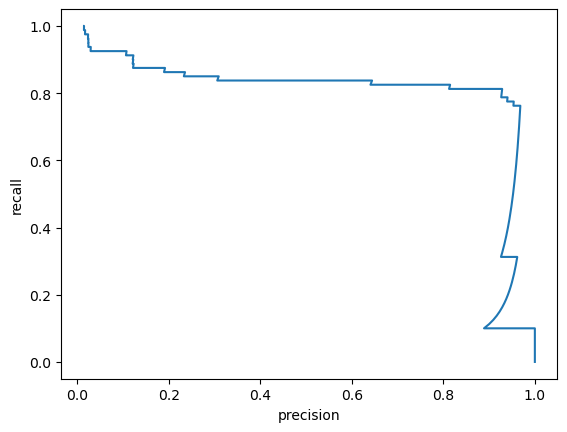

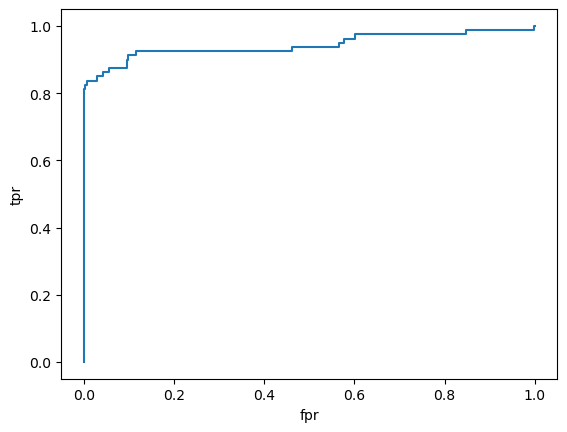

In [25]:
def answer_five():
    import matplotlib.pyplot as plt
    %matplotlib inline
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    lr = LogisticRegression().fit(X_train, y_train)
    lr_scores = lr.decision_function(X_test)
    
    
    precision, recall, threshold = precision_recall_curve(y_test, lr_scores)
    
    plt.plot(precision, recall)
    plt.xlabel('precision')
    plt.ylabel('recall')
    recall_value = recall[list(precision).index(0.75)]
    fpr, tpr, _ = roc_curve(y_test, lr_scores)
    plt.figure()
     
    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    value_nearest_to_16_in_fpr_list = 0.16 - min([abs(float(x)-0.16) for x in fpr])
    
    tpr_value = tpr[list(fpr).index(value_nearest_to_16_in_fpr_list)]
    
    ans = tuple([recall_value, tpr_value])
    return ans
    
    
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [30]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
    
    clf = LogisticRegression()
    
    grid_clf_acc = GridSearchCV(clf, grid_values, scoring = 'recall')
    
    grid_clf_acc.fit(X_train, y_train)
    
    y_scores = grid_clf_acc.cv_results_['mean_test_score']
    
    #print(y_scores)
    #print(len(y_scores))
    
    y_scores_array = np.array(y_scores).reshape(5,2)

    # Your code here
    
    return y_scores_array# Return your answer

answer_six()

array([[       nan, 0.80064935],
       [       nan, 0.80428571],
       [       nan, 0.80422078],
       [       nan, 0.80792208],
       [       nan, 0.80422078]])

In [ ]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())

KeyboardInterrupt: 